In [105]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import nltk
from collections import defaultdict
import seaborn as sns

from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import matplotlib.colors as mcolors

plt.rc('text', usetex = True)

## Impact matrices per model

In [121]:
model = 'babyberta'
def open_pkl_result(metric, layer):
    with open(f'results/{model}_{metric}_{layer}.pkl', 'rb') as f:
        # data is a list with sentences: 
        # each sentence consists of (sentence, tokenized_text, impact matrix, tree2list, nltk_tree)
        data = pickle.load(f)
    
    return data

In [122]:
def visualize_impact_matrix(sentence, imatrix, layer):
    fig, ax = plt.subplots()
    im = ax.imshow(imatrix, interpolation='nearest', cmap='YlGnBu')
    ax.figure.colorbar(im, ax=ax)

        # We want to show all ticks...
    ax.set(xticks=np.arange(imatrix.shape[1]),
           yticks=np.arange(imatrix.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=sentence, yticklabels=sentence,
           title='Impact matrix of sentence at layer ' + str(layer))
    
    ax.set_ylabel('Prediction of ...')
    ax.set_xlabel('Influence of ... on the prediction')
    
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
    fig.tight_layout()

In [123]:
metric = 'dist'
layer = 8
data = open_pkl_result(metric, layer)[0]
sentence, imatrix = data[1], data[2]

visualize_impact_matrix(sentence, imatrix, layer)

FileNotFoundError: [Errno 2] No such file or directory: 'results/gpt2_dist_8.pkl'

In [9]:
import matplotlib.pyplot as plt
import numpy as np

def visualize_all_layer_matrices(sentence, matrices):
    # Set up a 2x4 grid for the heatmaps
    fig, axs = plt.subplots(2, 4, figsize=(22, 10))
    
    # Ensure axs is a 2D array for easy indexing, even if there's only one row/column
    axs = axs.reshape(2, 4)
    
    for idx, ax in enumerate(axs.flat):
        # Get the current matrix
        imatrix = matrices[idx]
        
        # Create heatmap
        im = ax.imshow(imatrix, interpolation='nearest', cmap='YlGnBu')
        
        # Set tick marks and labels
        ax.set(xticks=np.arange(imatrix.shape[1]),
               yticks=np.arange(imatrix.shape[0]),
               xticklabels=sentence, yticklabels=sentence)
        
        # Rotate the tick labels for better layout
        plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
        
        # Optional: Set a title for each subplot to differentiate, e.g., by layer number
        ax.set_title(f'Layer {idx+1}')
    
    fig.supxlabel('Influence of ... on the prediction', fontsize=14)
    fig.supylabel('Prediction of ...', fontsize=14)

    # Adjust layout to prevent overlap
    fig.tight_layout()
    
    # Add a colorbar to the right of the grid. This adds a colorbar for the last plot,
    # but you might want to adjust or add a common colorbar for all.
    fig.colorbar(im, ax=axs, orientation='vertical', fraction=.1)

In [ ]:
metric = 'dist'
all_matrices = []
for i in range(1, 9):
    data = open_pkl_result(metric, i)[0]
    sentence, imatrix = data[1], data[2]
    all_matrices.append(imatrix)

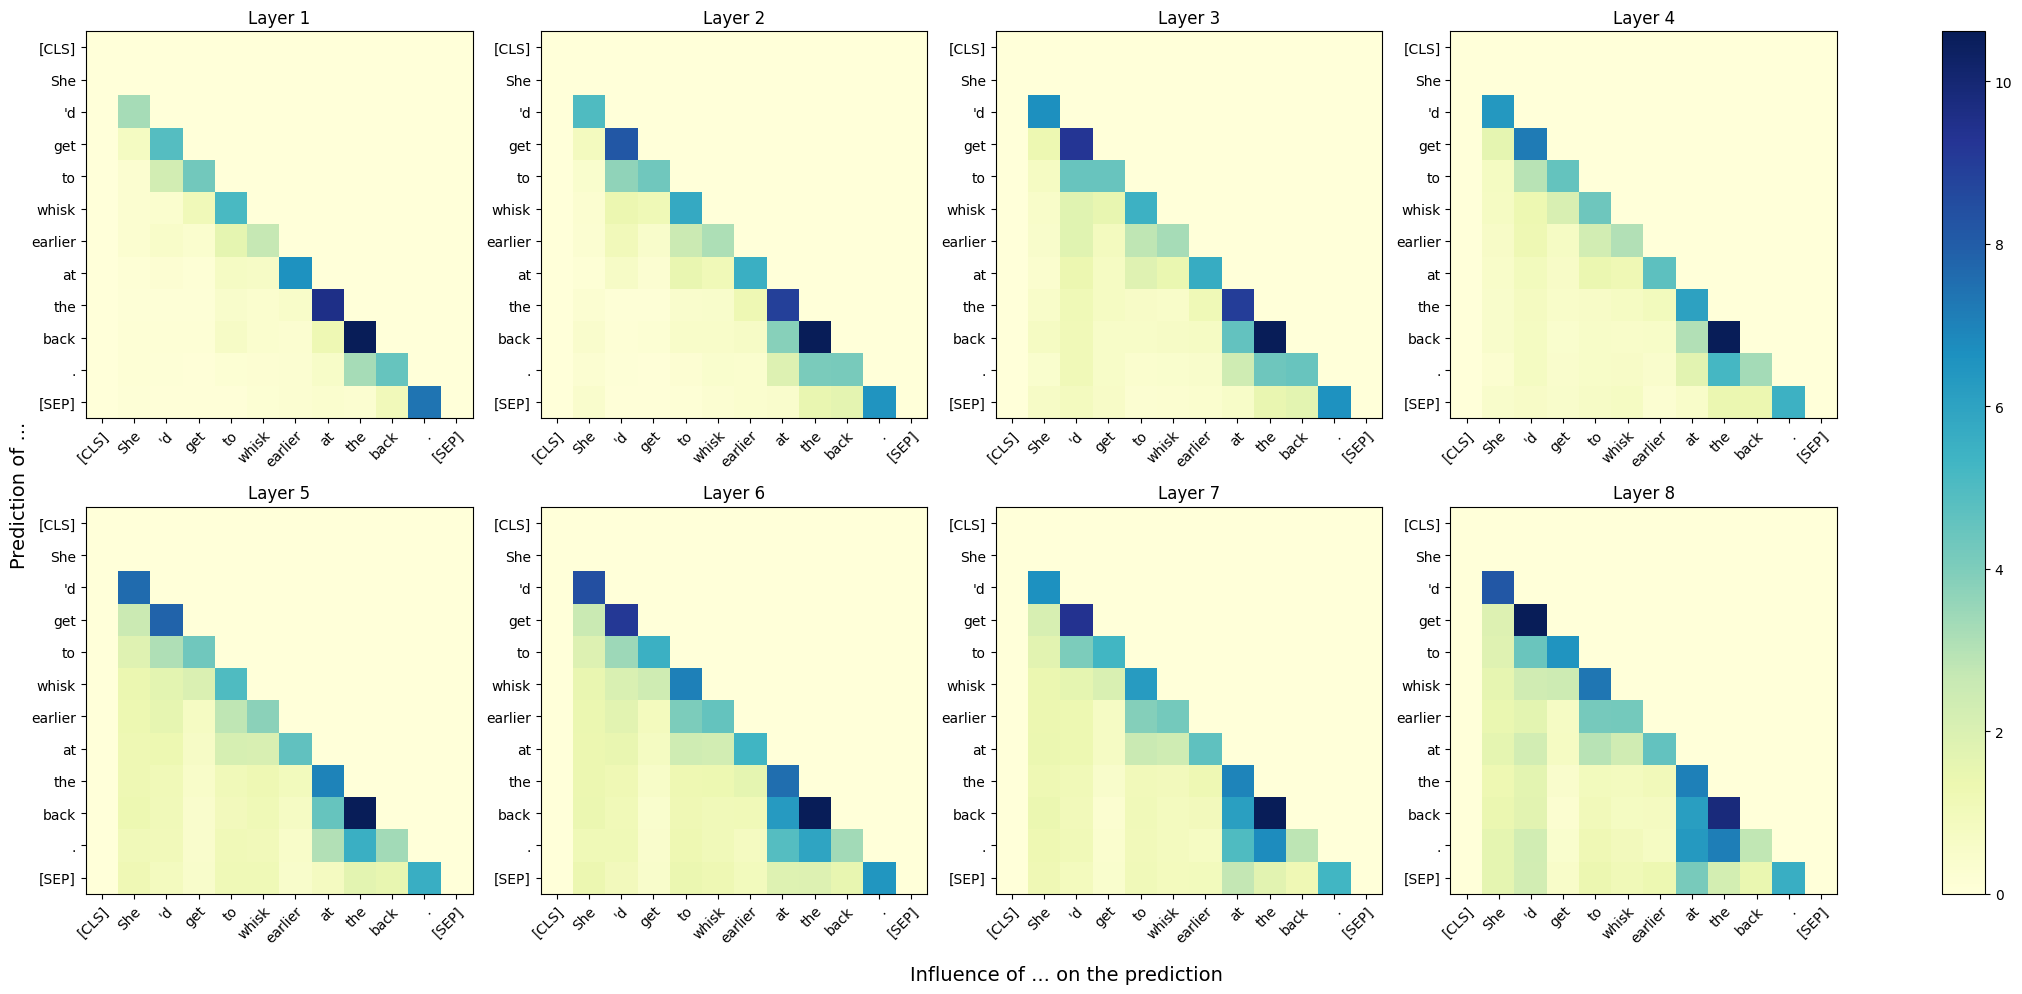

In [ ]:
sentence[2] = "'d"
visualize_all_layer_matrices(sentence, all_matrices)

## Spearman correlation

Spearman correlation are for the similarities between predicted trees and gold trees

In [13]:
def open_spearmann_resultfile(filename):
    with open(filename, 'rb') as f:
        data = pickle.load(f)
    
    return data

### Without punctuation

In [162]:
spearman_data = {'deberta' : None, 'gpt2' : None}
for model in ['gpt2', 'deberta']:
    filename = f'results/spearman_dist_{model}_without_punct.pkl'
    spearman_data[model] = open_spearmann_resultfile(filename)
spearman_data

{'deberta': {'deberta': [(0.47266254076315356, 0.1634713308003209),
   (0.4971603194795072, 0.15411890349758206),
   (0.5074292139524706, 0.14309572783985242),
   (0.4995044357131044, 0.14672281632469011),
   (0.494138674837841, 0.14972078010697593),
   (0.4916793619274196, 0.15162965715437193),
   (0.496852071390417, 0.1489383268075613),
   (0.4996809357291788, 0.14808100939249316),
   (0.49779136218243875, 0.14910220569105406)],
  'gpt2': [(0.47266254076315356, 0.1634713308003209),
   (0.5008463323178525, 0.1468231883350638),
   (0.500759577736112, 0.1467774460471787),
   (0.5005243783845815, 0.14689706257203128),
   (0.5006392716960119, 0.14686785161236957),
   (0.5019775961879158, 0.14617550709466418),
   (0.5033503376666629, 0.1451873670540362),
   (0.50258547753921, 0.14523623582243606),
   (0.5091398925468793, 0.1411995160099522)]},
 'gpt2': {'deberta': [(0.47266254076315356, 0.1634713308003209),
   (0.4971603194795072, 0.15411890349758206),
   (0.5074292139524706, 0.14309572783

In [141]:
def plot_spearman_results(spearman_data):
    fig, ax = plt.subplots(figsize=(6, 4))
    ax.plot(range(len(spearman_data['deberta'])), list(zip(*spearman_data['deberta']))[0], label='deberta')
    ax.plot(range(len(spearman_data['gpt2'])), list(zip(*spearman_data['gpt2']))[0], label='gpt2')
    ax.set_xlabel('Layer')
    ax.set_ylabel('Spearman correlation (-1 < r < 1)')
    ax.set_title('Spearman correlation')
    ax.legend()
    plt.show()

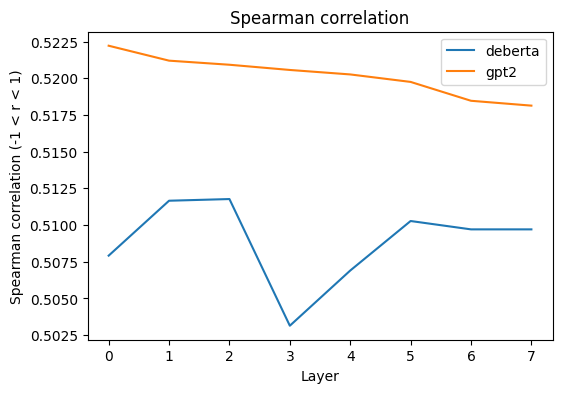

In [142]:
plot_spearman_results(spearman_data)

### With punctuation

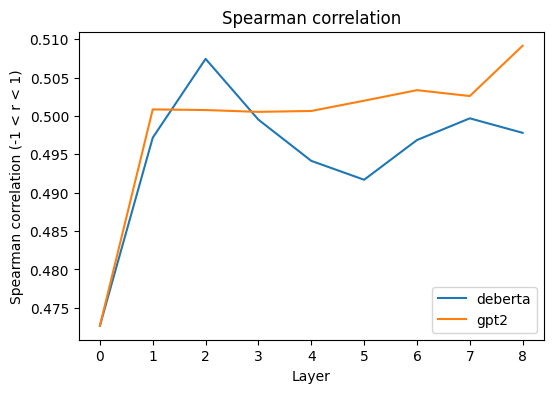

In [164]:
filename = f'results/spearman_dist_all.pkl'
spearman_data = open_spearmann_resultfile(filename)
plot_spearman_results(spearman_data)

## Classic evaluation

### Without punctuation

In [165]:
def open_pkl_result(path):
    with open(path, 'rb') as f:
        # data is list with tuples per sentene: (precision, recall, f1)
        data = pickle.load(f)
    
    return data

In [155]:
def plot_pr_rc_f1(data, model):
    fig, ax = plt.subplots(figsize=(6, 4))
    ax.plot(range(len(data)), list(zip(*data))[0], label='precision')
    ax.plot(range(len(data)), list(zip(*data))[1], label='recall')
    ax.plot(range(len(data)), list(zip(*data))[2], label='f1')
    ax.set_xlabel('Layer')
    ax.set_ylabel('Score')
    ax.set_title(f'Precision, recall and f1 for {model}')
    ax.legend()
    plt.show()

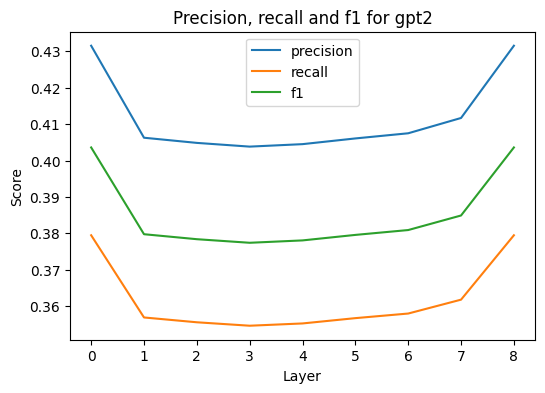

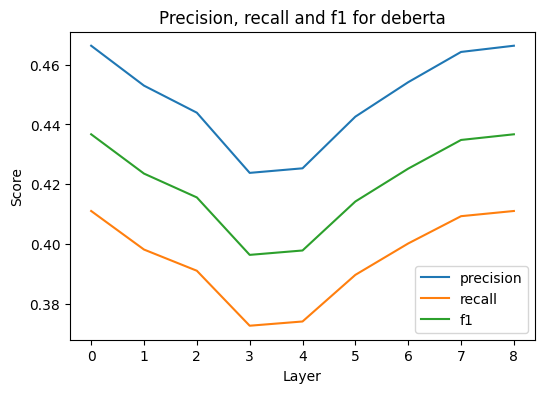

In [156]:
gpt2_classic = open_pkl_result(f'results/classic_dist_gpt2_all_layers_without_punct.pkl')
deberta_classic = open_pkl_result(f'results/classic_dist_deberta_all_layers_without_punct.pkl')

plot_pr_rc_f1(gpt2_classic, 'gpt2')
plot_pr_rc_f1(deberta_classic, 'deberta')

In [157]:
def plot_classic_both(data1, data2, model1, model2):
    fig, ax = plt.subplots(figsize=(6, 4))
    colors = ['tab:orange', 'tab:blue', 'tab:green']
    for i, (data, model) in enumerate(zip([data1, data2], [model1, model2])):
        if i == 0:
            style = '-'
        else:
            style = '--'
        ax.plot(range(len(data)), list(zip(*data))[0], label=f'{model} precision', color=colors[0], linestyle=style)
        ax.plot(range(len(data)), list(zip(*data))[1], label=f'{model} recall', color=colors[1], linestyle=style)
        ax.plot(range(len(data)), list(zip(*data))[2], label=f'{model} f1', color=colors[2], linestyle=style)

    # ax.plot(range(len(data1)), list(zip(*data1))[0], label=f'{model1} precision')
    # ax.plot(range(len(data2)), list(zip(*data2))[0], label=f'{model2} precision')

    # ax.plot(range(len(data1)), list(zip(*data1))[1], label=f'{model1} recall')
    # ax.plot(range(len(data2)), list(zip(*data2))[1], label=f'{model2} recall')
    
    # ax.plot(range(len(data1)), list(zip(*data1))[2], label=f'{model1} f1')
    # ax.plot(range(len(data2)), list(zip(*data2))[2], label=f'{model2} f1')
    ax.set_xlabel('Layer')
    ax.set_ylabel('Score')
    ax.set_title(f'Precision, Recall and F1 for {model1} and {model2}')
    
    # Shrink current axis by 20%
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

    # Put a legend to the right of the current axis
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))


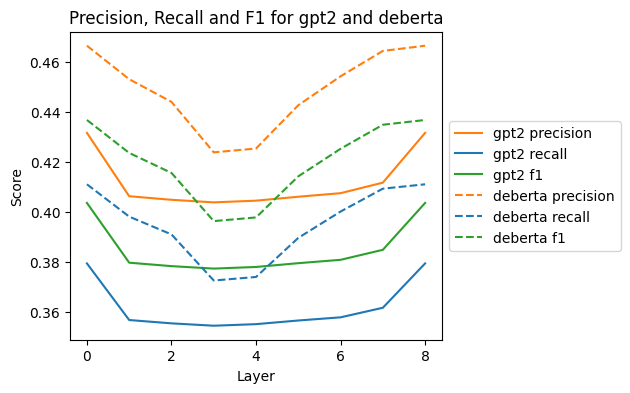

In [158]:
plot_classic_both(gpt2_classic, deberta_classic, 'gpt2', 'deberta')

### With punctuation

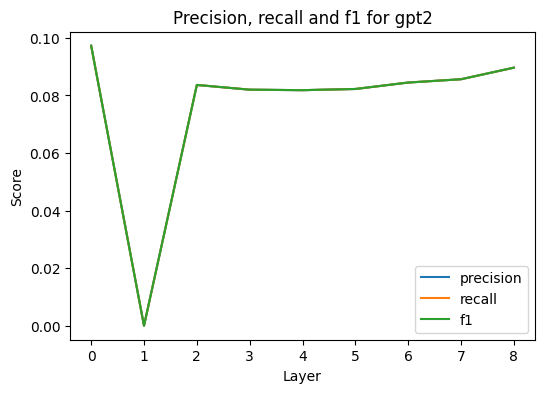

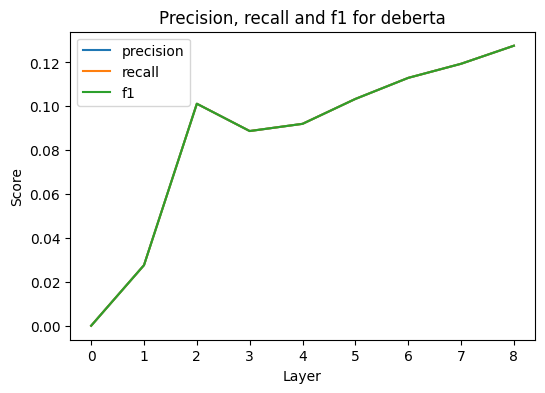

In [166]:
gpt2_classic = open_pkl_result(f'results/classic_dist_gpt2_all_layers.pkl')
deberta_classic = open_pkl_result(f'results/classic_dist_deberta_all_layers.pkl')

plot_pr_rc_f1(gpt2_classic, 'gpt2')
plot_pr_rc_f1(deberta_classic, 'deberta')

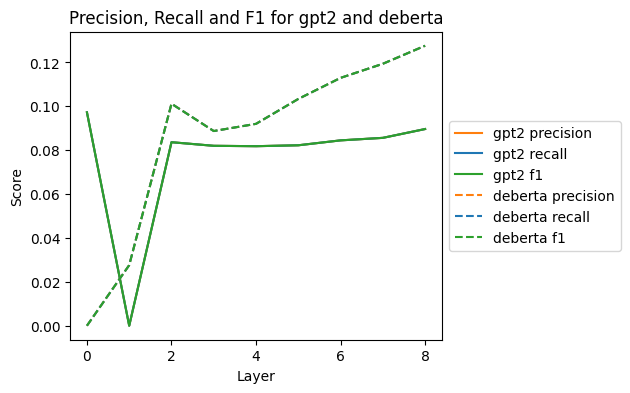

In [167]:
plot_classic_both(gpt2_classic, deberta_classic, 'gpt2', 'deberta')

## Quantitative analysis MLM and CLM

In [ ]:
def open_pkl_result(model, layer):
    with open(f'results/i_matrices/{model}_dist_{layer}.pkl', 'rb') as f:
        # data is a list with sentences: 
        # each sentence consists of (sentence, tokenized_text, impact matrix, tree2list, nltk_tree)
        data = pickle.load(f)
    
    return data

In [ ]:
def get_all_results():
    mlm_clm_results = {'gpt2' : {}, 'deberta' : {}}

    for model in ['gpt2', 'deberta']:
        for layer in range(1, 9):
            data = open_pkl_result(model, layer)
            mlm_clm_results[model][layer] = data
    
    return mlm_clm_results

In [ ]:
def get_diff_only_lower(mlm_clm_results):
    diff_per_layer = defaultdict(list)
    for i, (clm_layers, mlm_layers) in enumerate(zip(mlm_clm_results['gpt2'].values(), mlm_clm_results['deberta'].values())):
        for s in range(len(clm_layers)):
            # set values upper triangle to 0
            below_mlm = np.tril(mlm_layers[s][2], k=-1)
            diff_per_layer[i].append(np.mean(np.abs(clm_layers[s][2] - below_mlm)))
    return diff_per_layer

In [ ]:
def get_diff_mean_mlm(mlm_clm_results):
    diff_per_layer = defaultdict(list)
    for i, (clm_layers, mlm_layers) in enumerate(zip(mlm_clm_results['gpt2'].values(), mlm_clm_results['deberta'].values())):
        for s in range(len(clm_layers)):
            # mean of upper & lower triangle
            mean_triangles = (np.triu(mlm_layers[s][2], k=1).T + np.tril(mlm_layers[s][2], k=-1)) / 2
            diff_per_layer[i].append(np.mean(np.abs(clm_layers[s][2] - mean_triangles)))
            
    return diff_per_layer

In [ ]:
def plot_diff_per_layer(diff_per_layer):
    fig, ax = plt.subplots(figsize=(6, 4))
    ax.bar(range(len(diff_per_layer)), [np.mean(diff_per_layer[i]) for i in range(len(diff_per_layer))])
    ax.set_xlabel('Layer')
    ax.set_ylabel('Mean difference')
    ax.set_title('Mean difference between MLM and CLM')
    plt.show()

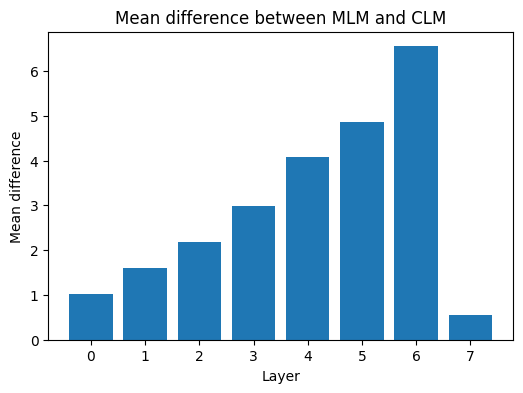

In [ ]:
results = get_all_results()
diff = get_diff_mean_mlm(results)
plot_diff_per_layer(diff)

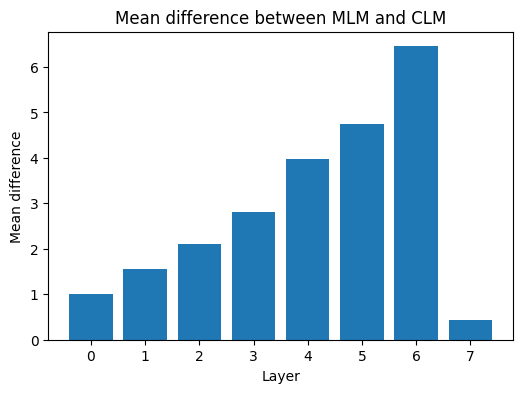

In [ ]:
diff_lower = get_diff_only_lower(results)
plot_diff_per_layer(diff_lower)

In [124]:
def get_diff_matrix_lowertr(mlm_clm_results):
    diff_per_layer = defaultdict(list)
    for i, (clm_layers, mlm_layers) in enumerate(zip(mlm_clm_results['gpt2'].values(), mlm_clm_results['deberta'].values())):
        for s in range(len(clm_layers)):
            # set values upper triangle to 0
            below_mlm = np.tril(mlm_layers[s][2], k=-1)
            diff_per_layer[i].append(np.abs(clm_layers[s][2] - below_mlm))
    return diff_per_layer

In [133]:
def visualize_diff_matrices(matrices, sent_idx):
    # Set up a 2x4 grid for the heatmaps
    fig, axs = plt.subplots(2, 4, figsize=(22, 10))
    
    # Ensure axs is a 2D array for easy indexing, even if there's only one row/column
    axs = axs.reshape(2, 4)
    
    for idx, ax in enumerate(axs.flat):
        # Get the current matrix
        imatrix = matrices[idx][sent_idx]
        
        # Create heatmap
        print(imatrix.shape)
        im = ax.imshow(imatrix, interpolation='nearest', cmap='YlGnBu')
        
        # Optional: Set a title for each subplot to differentiate, e.g., by layer number
        ax.set_title(f'Layer {idx+1}')
    
    fig.supxlabel('Influence of ... on the prediction', fontsize=14)
    fig.supylabel('Prediction of ...', fontsize=14)

    # Adjust layout to prevent overlap
    fig.tight_layout()
    
    # Add a colorbar to the right of the grid. This adds a colorbar for the last plot,
    # but you might want to adjust or add a common colorbar for all.
    fig.colorbar(im, ax=axs, orientation='vertical', fraction=.1)

(14, 14)
(14, 14)
(14, 14)
(14, 14)
(14, 14)
(14, 14)
(14, 14)
(14, 14)


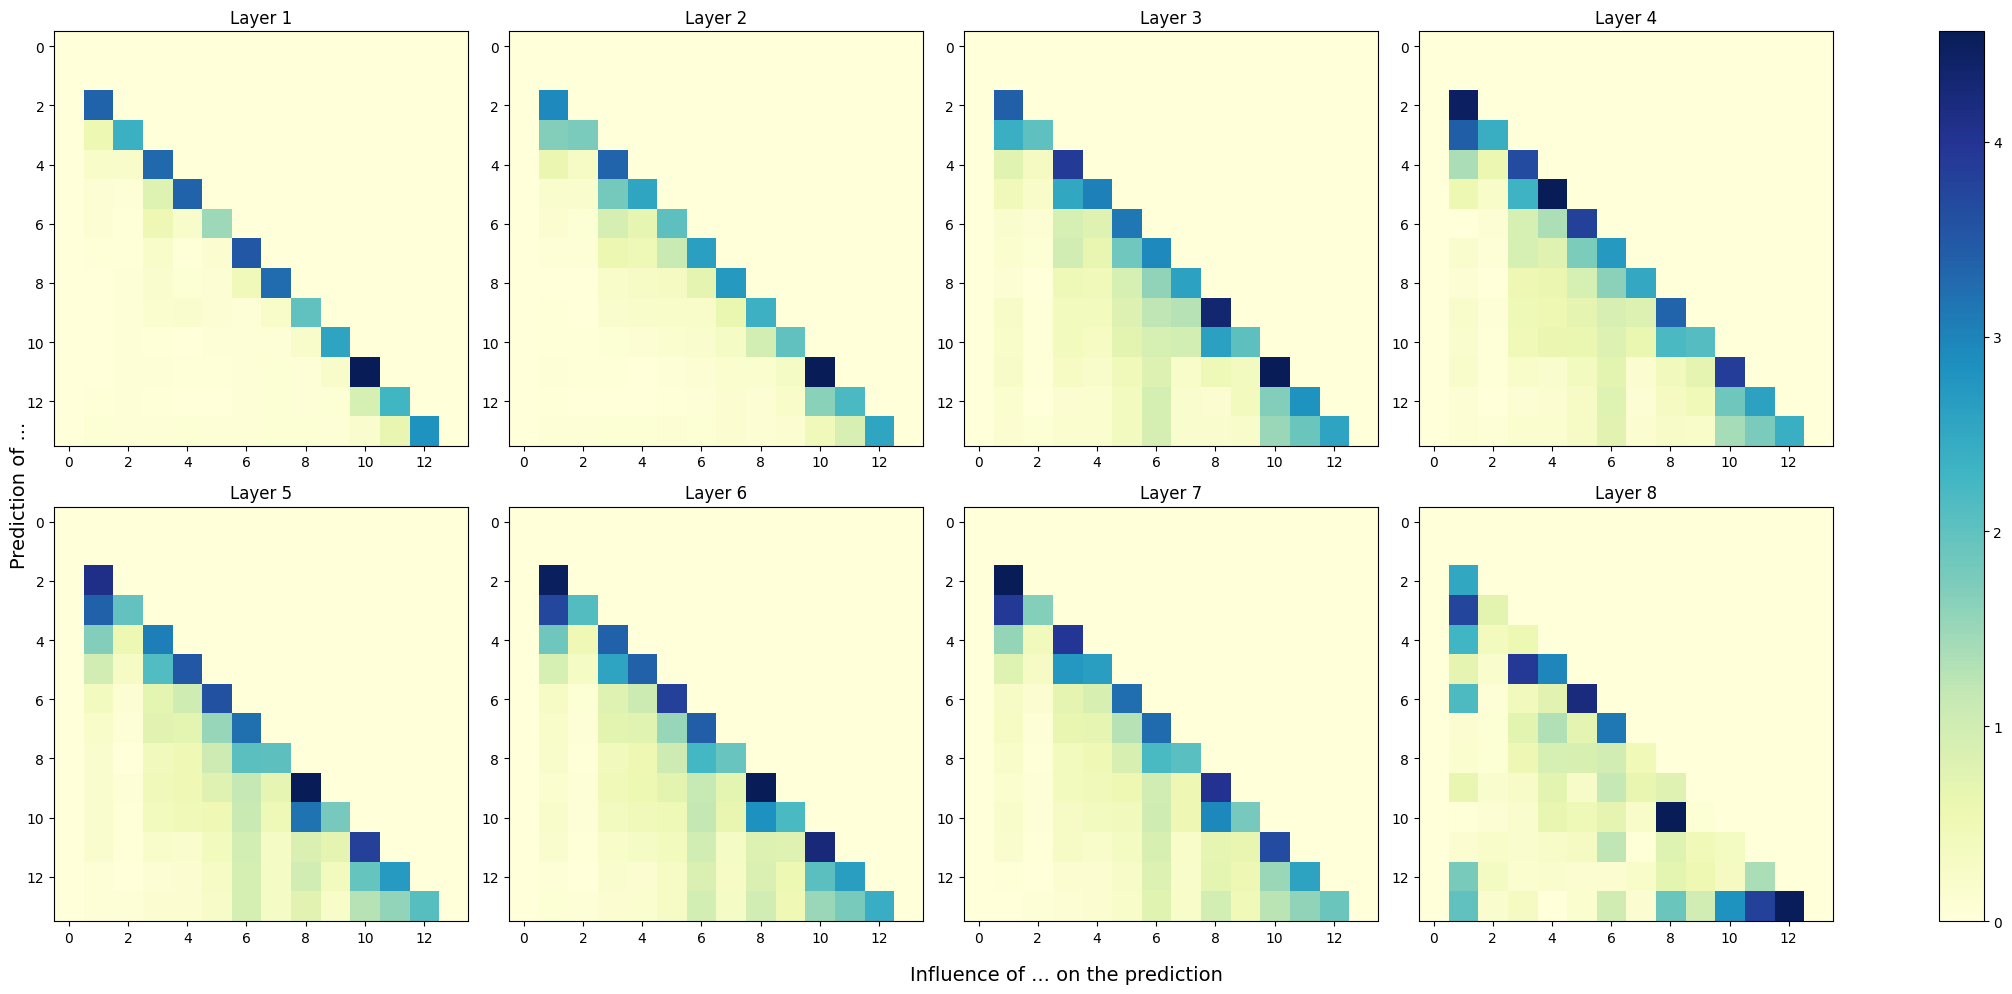

In [134]:
# only for one sentence
data_diff = get_diff_matrix_lowertr(results)
visualize_diff_matrices(data_diff, sent_idx=5)

## Spearman retrained grammars

In [44]:
def plot_spearman_results_topks(spearman_data):
    fig, ax = plt.subplots(figsize=(6, 4))

    colors = ['#1F77B4', '#8FBBD9', '#FF7F0E', '#FFBF86']
    for topk in spearman_data.keys():
        ax.plot(range(len(spearman_data[topk])), list(zip(*spearman_data[topk]))[0], label=topk, color=colors.pop(0))
    #ax.plot(range(len(spearman_data['deberta'])), list(zip(*spearman_data['deberta']))[0], label='deberta')
    ax.set_xlabel('Layer')
    ax.set_ylabel('Spearman correlation (-1 $\leq$ r $\geq$ 1)')
    ax.set_title('Spearman correlation')

    sns.despine()
    
    plt.legend(title='Grammar subsets')
    plt.savefig(f'plots/spearman_perturbed.pdf')

In [45]:
spearman_data = {}
for topk in [0.2, 0.3, 0.4, 0.5]:
    filename = f'test_results_v2/eval/deberta/normal/{topk}/spearman_dist_deberta_without_punct.pkl'
    spearman_data[topk] = open_spearmann_resultfile(filename)
spearman_data

{0.2: [(0.4946203396366384, 0.16881525786520643),
  (0.3310485983746865, 0.26146314960583167),
  (0.5163036845443963, 0.1524779249357873),
  (0.5336453726708468, 0.13354888882852003),
  (0.5205738892969155, 0.1461935691107355),
  (0.515518258713039, 0.1471573781314017),
  (0.5121977726004084, 0.15303366383139053),
  (0.49607251577449113, 0.17353856342252705),
  (0.4928966684740142, 0.16943922419526905)],
 0.3: [(0.5727488323245584, 0.10195468905949695),
  (0.3115125743793287, 0.2655499759589468),
  (0.6007457520869305, 0.08877836341640438),
  (0.6101252519344771, 0.08797113699281178),
  (0.6060978384724581, 0.09059644160733143),
  (0.5934062081962035, 0.09452276991959645),
  (0.5898597919534464, 0.09657655468456641),
  (0.5776134598211529, 0.10013198492125425),
  (0.5695029172528911, 0.10384861057373675)],
 0.4: [(0.5267566984599802, 0.13162340916288343),
  (0.293387786380429, 0.26446569954443594),
  (0.5345342038429541, 0.13444941726690074),
  (0.5355637381273524, 0.1309059664962921),

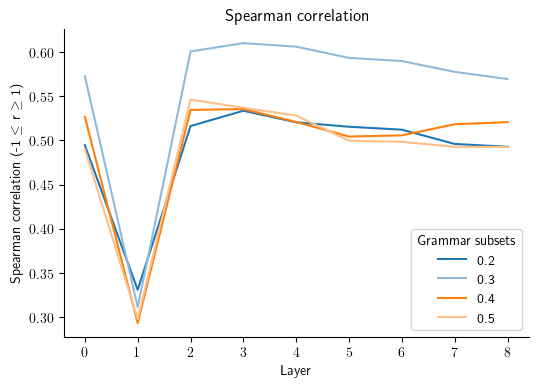

In [46]:
plot_spearman_results_topks(spearman_data)

## Plot classic

In [3]:
import pickle

In [21]:
topk = 0.2
precisions = {}
recalls = {}
f1s = {}
for topk in [0.2, 0.3, 0.4, 0.5]:
    with open(f'/Users/sperdijk/Documents/Master/Jaar_3/Thesis/thesis_code/perturbed-masking/test_results_v2/eval/deberta/normal/{topk}/classic_dist_deberta_without_punct.pkl', 'rb') as f:
        data = pickle.load(f)
        precisions[topk] = list(zip(*data))[0]
        recalls[topk] = list(zip(*data))[1]
        f1s[topk] = list(zip(*data))[2]
f1s

{0.2: (array([0.35608222]),
  array([0.32481669]),
  array([0.39452413]),
  array([0.39064564]),
  array([0.36383946]),
  array([0.29301294]),
  array([0.31389262]),
  array([0.36023639]),
  array([0.37480979])),
 0.3: (array([0.33431661]),
  array([0.26353521]),
  array([0.315057]),
  array([0.30257927]),
  array([0.30494106]),
  array([0.33549691]),
  array([0.32778805]),
  array([0.34342739]),
  array([0.33957774])),
 0.4: (array([0.32947656]),
  array([0.2752918]),
  array([0.28431392]),
  array([0.28650913]),
  array([0.3029466]),
  array([0.30385453]),
  array([0.31431627]),
  array([0.32186284]),
  array([0.32117232])),
 0.5: (array([0.33499413]),
  array([0.32032173]),
  array([0.29772622]),
  array([0.29817547]),
  array([0.31634538]),
  array([0.31452539]),
  array([0.32226344]),
  array([0.3228444]),
  array([0.33493272]))}

In [29]:
def plot_classic_results_topks(data, name):
    fig, ax = plt.subplots(figsize=(6, 4))

    colors = ['#1F77B4', '#8FBBD9', '#FF7F0E', '#FFBF86']
    for topk in data.keys():
        ax.plot(range(len(data[topk])), list(zip(*data[topk]))[0], label=topk, color=colors.pop(0))
    #ax.plot(range(len(spearman_data['deberta'])), list(zip(*spearman_data['deberta']))[0], label='deberta')
    ax.set_xlabel('Layer')
    ax.set_ylabel(f'{name}')
    ax.set_title(f'{name}')

    sns.despine()
    
    plt.legend(title='Grammar subsets')
    plt.savefig(f'plots/classic_{name.lower()}.pdf')

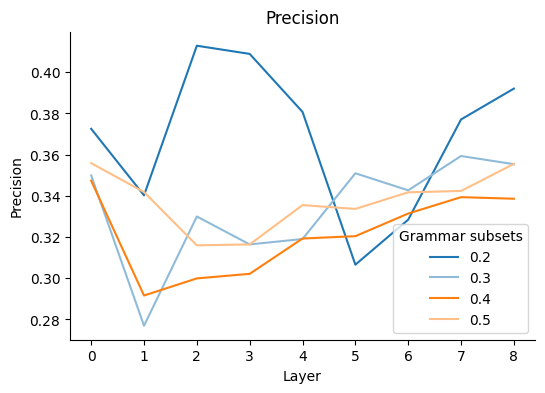

In [30]:
plot_classic_results_topks(precisions, "Precision")

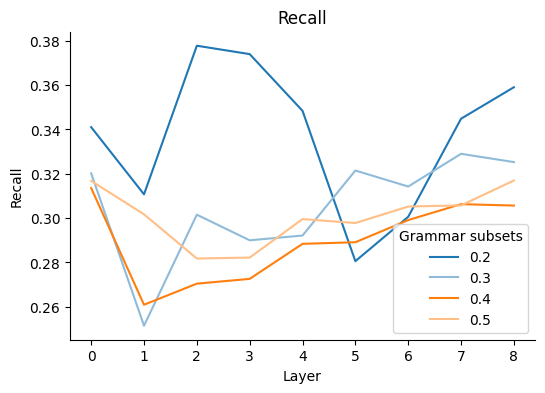

In [31]:
plot_classic_results_topks(recalls, "Recall")

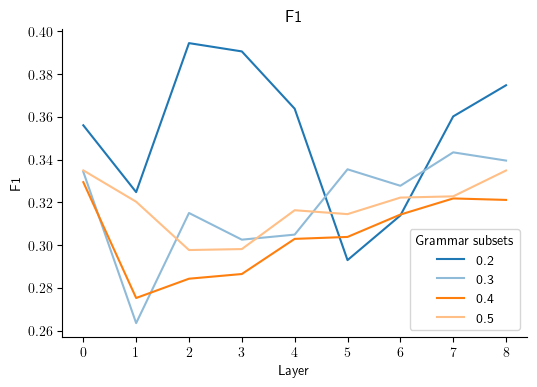

In [47]:
plot_classic_results_topks(f1s, "F1")

## Impact matrices retrained grammars

In [230]:
sentences = defaultdict(list)
imatrices = defaultdict(list)
gold_parses = defaultdict(list)
for topk in [0.2, 0.3, 0.4, 0.5]:
    matrices = []
    for i in range(9):
        with open(f'/Users/sperdijk/Documents/Master/Jaar_3/Thesis/thesis_code/perturbed-masking/test_results_v2/i_matrices/deberta/normal/{topk}/deberta_dist_{i}.pkl', 'rb') as f:
            data = list(zip(*pickle.load(f)))

        if i == 0:
            sentences[topk].append(data[1])
            gold_parses[topk].append(data[4])
        matrices.append(data[2])
    imatrices[topk].append(matrices)

In [222]:
print(gold_parses[0.2])

[(Tree('S_0', [Tree('ATS_3', [Tree('NP_20', [Tree('PRP_0', ['I'])]), Tree('VP_2', [Tree('ATVP_2', [Tree('VP_5', [Tree('ATVP_18', [Tree('VBD_11', ['felt']), Tree('NP_14', [Tree('ATNP_17', [Tree('DT_16', ['a']), Tree('JJ_11', ['little'])]), Tree('NN_22', ['breath'])])]), Tree('PP_8', [Tree('IN_1', ['into']), Tree('NP_1', [Tree('DT_18', ['the']), Tree('NN_27', ['air'])])])]), Tree('CC_5', ['and'])]), Tree('VP_5', [Tree('VBD_16', ['nodded'])])])]), Tree('DOT_0', ['.'])]), Tree('S_0', [Tree('ATS_3', [Tree('NP_20', [Tree('PRP_0', ['I'])]), Tree('VP_2', [Tree('ATVP_8', [Tree('ATVP_23', [Tree('ATVP_18', [Tree('VBD_11', ['took']), Tree('NP_14', [Tree('ATNP_17', [Tree('DT_16', ['a']), Tree('JJ_11', ['great'])]), Tree('NN_22', ['thing'])])]), Tree('PP_8', [Tree('IN_1', ['into']), Tree('NP_1', [Tree('DT_18', ['the']), Tree('NN_27', ['door'])])])]), Tree('COMMA_0', [','])]), Tree('S_1', [Tree('VP_14', [Tree('VBG_5', ['sitting']), Tree('PP_8', [Tree('IN_1', ['into']), Tree('NP_1', [Tree('DT_18', ['t

In [185]:
import matplotlib.pyplot as plt
import numpy as np

def visualize_all_layer_matrices(sentence, matrices, cmap='YlGnBu', alpha=1.0, i=0, topk=0.2):
    # Set up a 2x4 grid for the heatmaps
    fig, axs = plt.subplots(2, 4, figsize=(22, 10))
    
    # Ensure axs is a 2D array for easy indexing, even if there's only one row/column
    axs = axs.reshape(2, 4)
    
    for idx, ax in enumerate(axs.flat):
        # Get the current matrix
        imatrix = matrices[idx]
        
        # Create heatmap
        im = ax.imshow(imatrix, interpolation='nearest', cmap=cmap, alpha=alpha)
        
        # Set tick marks and labels
        ax.set(xticks=np.arange(imatrix.shape[1]),
               yticks=np.arange(imatrix.shape[0]),
               xticklabels=sentence, yticklabels=sentence)
        
        # Rotate the tick labels for better layout
        plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
        
        # Optional: Set a title for each subplot to differentiate, e.g., by layer number
        ax.set_title(f'Layer {idx+1}')
    
    fig.supxlabel('Influence of ... on the prediction', fontsize=14)
    fig.supylabel('Prediction of ...', fontsize=14)
    fig.suptitle(f'Impact matrices per layer (grammar subset = {topk})', fontsize=20)

    # Adjust layout to prevent overlap
    fig.tight_layout()
    
    # Add a colorbar to the right of the grid. This adds a colorbar for the last plot,
    # but you might want to adjust or add a common colorbar for all.
    fig.colorbar(im, ax=axs, orientation='vertical', fraction=.1)
    fig.savefig(f'plots/impact_matrices_{topk}_{i}.pdf')

In [215]:
def create_custom_cmap():
    # Get the OrRd colormap
    orrd = plt.get_cmap('OrRd')
    orrd_colors = orrd(np.linspace(0, 1, 256))

    # Create a gradient from lightblue to the first color in OrRd
    lightblue_to_first_color = mcolors.LinearSegmentedColormap.from_list(
        'custom_gradient', ['#1F77B4', orrd_colors[0]], N=128)

    # Combine the two colormaps
    combined_colors = np.vstack((
        lightblue_to_first_color(np.linspace(0, 1, 128)),
        orrd_colors[1:]
    ))

    # Create a new colormap from the combined colors
    custom_cmap = mcolors.LinearSegmentedColormap.from_list('custom_cmap', combined_colors)

    return custom_cmap

# Create the custom colormap
newcmp = create_custom_cmap()
newcmp = ListedColormap(newcmp(np.linspace(0.3, 0.9, 256)))

In [216]:
# oldcmp = cm.get_cmap('RdYlBu_r', 512)

# line_color = oldcmp(0)
# newcmp = ListedColormap(oldcmp(np.linspace(0.25, .85, 256)))

In [232]:
topk = 0.3
which = 2
test_sentence = sentences[topk][0][which].copy()

for i, word in enumerate(test_sentence):
    if '<apostrophe>' in word:
        # replace each occurences of <apostrophe> with "'"

        test_sentence[i] = word.replace('<apostrophe>', "'")

# for i, word in enumerate(test_sentence):
#     if '<apostrophe>' in word:
#         # replace each occurences of <apostrophe> with "'"
#         test_sentence[i] = "'"

gold_test = gold_parses[topk][0][which]
gold_test.pretty_print()

test_all_layers = []
for i in range(1, 9):
    test_all_layers.append(imatrices[topk][0][i][which])

len(test_all_layers)

                                                                                        S_0                                                                   
                                                                                _________|_________________________________________________________________    
                                                                             ATS_3                                                                         |  
                                                                     __________|______________________________________________                             |   
                                                                  ATS_16                                                      |                            |  
                                                 ___________________|____________________                                     |                            |   
                                           

8

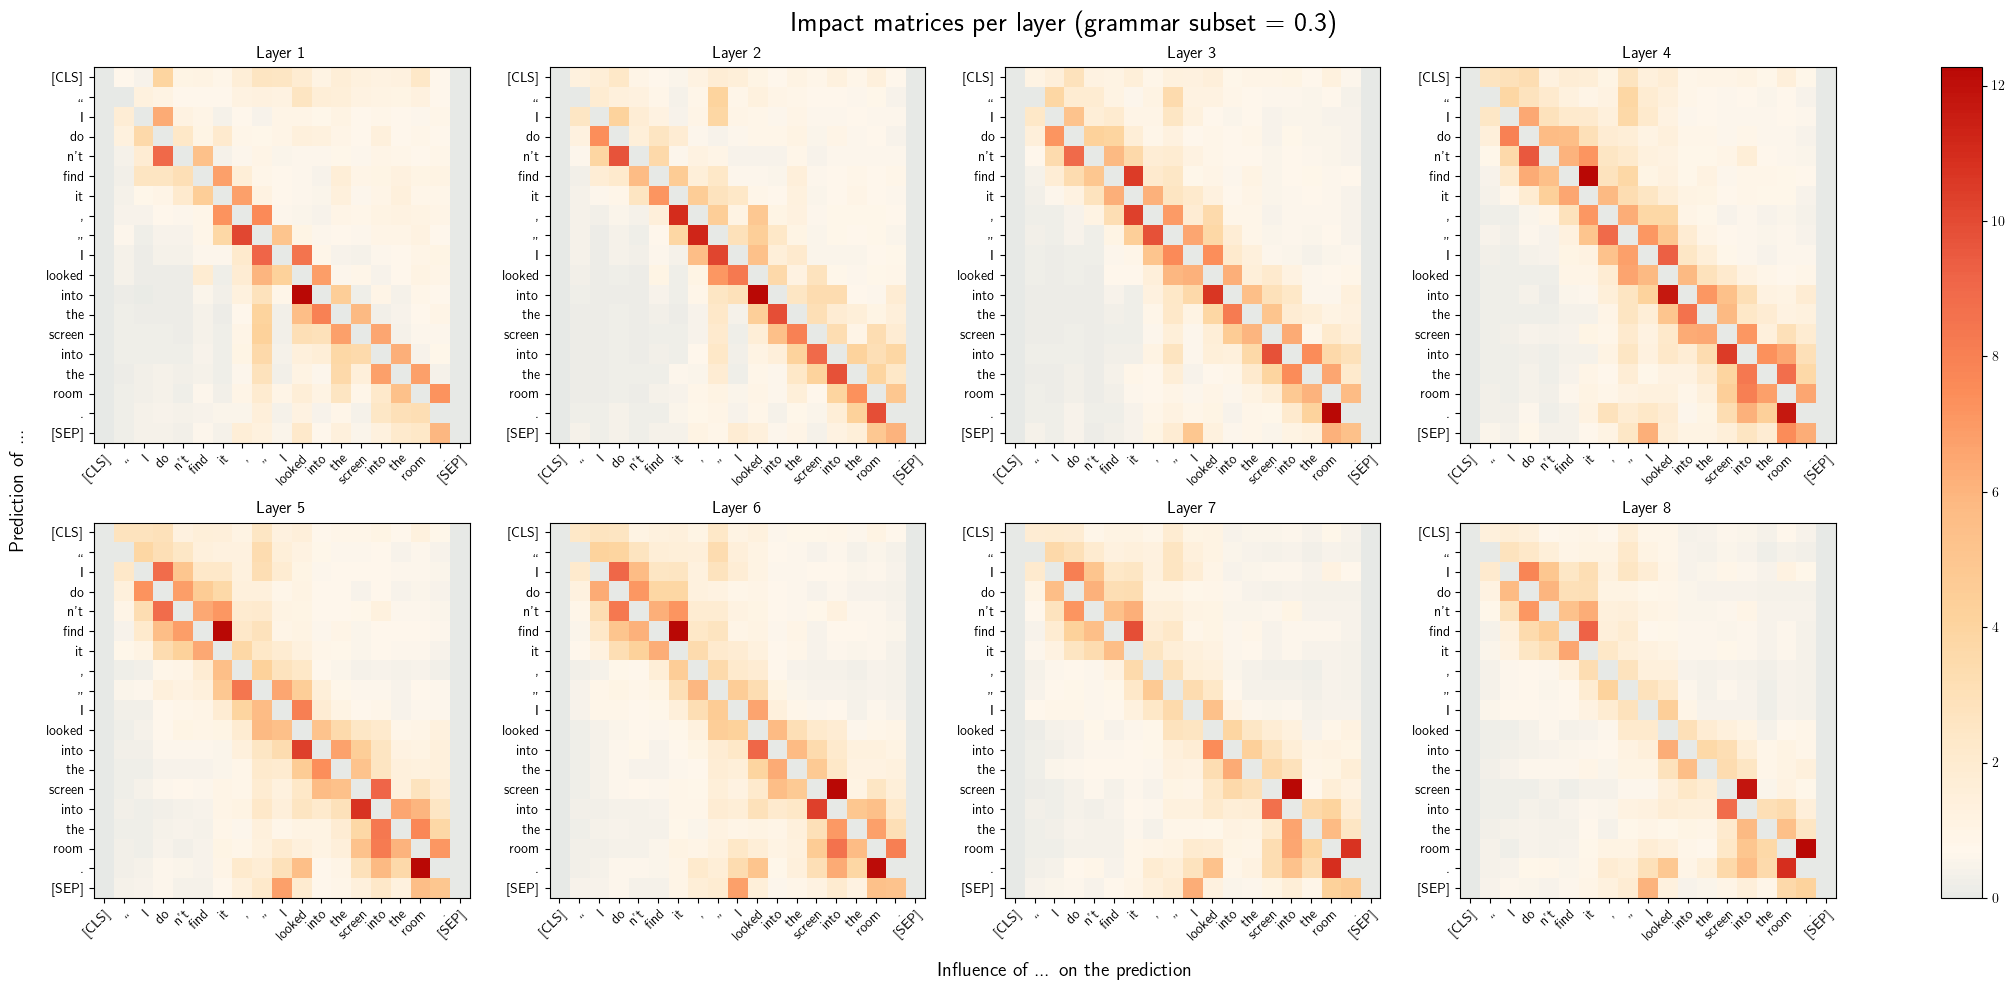

In [220]:
visualize_all_layer_matrices(test_sentence, test_all_layers, cmap=newcmp, i=which, topk=topk)

In [211]:
def visualize_one_layer_matrix(sentence, imatrix, layer, cmap='YlGnBu', alpha=1.0):
    fig, ax = plt.subplots()
    im = ax.imshow(imatrix, interpolation='nearest', cmap=cmap, alpha=alpha)
    ax.figure.colorbar(im, ax=ax)

    # We want to show all ticks...
    ax.set(xticks=np.arange(imatrix.shape[1]),
           yticks=np.arange(imatrix.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=sentence, yticklabels=sentence,
           title='Impact matrix of sentence at layer ' + str(layer))
    
    ax.set_ylabel('Prediction of ...')
    ax.set_xlabel('Influence of ... on the prediction')
    
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
    fig.tight_layout()
    fig.savefig(f'plots/impact_matrix_{topk}_{which}_{layer}.pdf')

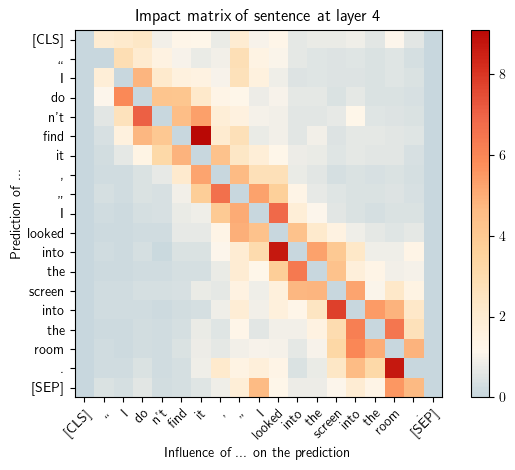

In [213]:
visualize_one_layer_matrix(test_sentence, test_all_layers[3], 4, cmap=newcmp)